In [1]:
# Necessary Imports
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Read CSV Files To DataFrame
population_data_df = pd.read_csv("../Data/population_data.csv")
concentration_data_df = pd.read_csv("../Data/co2_ppm.csv")

In [3]:
# Merge Datasets
merged_table = pd.merge(population_data_df, concentration_data_df, on = "Year", how = "left")
population_concentration_df = merged_table[["population_millions", "CO2_concentration_per_million"]]
population_concentration_df

,population_millions,CO2_concentration_per_million
0,5581597.598,869.636645
1,5663150.428,863.100924
2,5744212.930,858.225479
3,5824891.931,859.062572
4,5905045.647,867.379574
5,5984794.075,866.162913
6,6064239.033,854.147358
7,6143493.806,878.764146
8,6222626.531,888.096012
9,6301773.172,884.272209


In [4]:
X = population_concentration_df.population_millions.values.reshape(-1, 1)
y = population_concentration_df.CO2_concentration_per_million.values.reshape(-1, 1)
print("Shape: ", X.shape, y.shape)

Shape:  (23, 1) (23, 1)


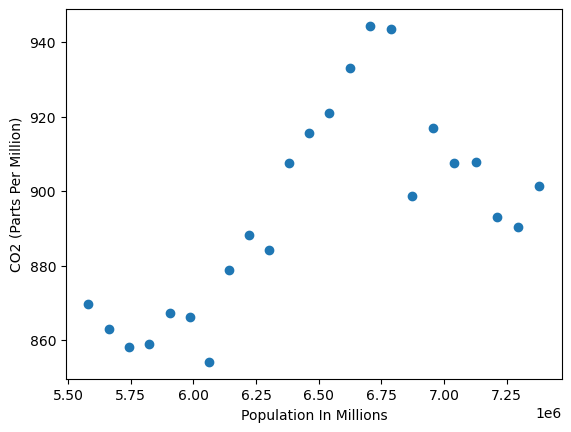

In [5]:
plt.scatter(X, y) 
plt.xlabel("Population In Millions")
plt.ylabel("CO2 (Parts Per Million)")
plt.savefig("../Images/PopulationToCO2Scatter.png")

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
model = LinearRegression()

In [8]:
model.fit(X_train, y_train)

LinearRegression()

In [9]:
predicted = model.predict(X_test)

In [10]:
print("Weight coefficients: ", model.coef_)
print("y-axis intercept: ", model.intercept_) 

Weight coefficients:  [[2.96821972e-05]]
y-axis intercept:  [698.12896131]


In [11]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])

print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[5581597.598]]
Max X Value: [[7379796.967]]


In [12]:
# Calculate Predicted y_min & y_max
y_min = model.predict(x_min)
y_max = model.predict(x_max)

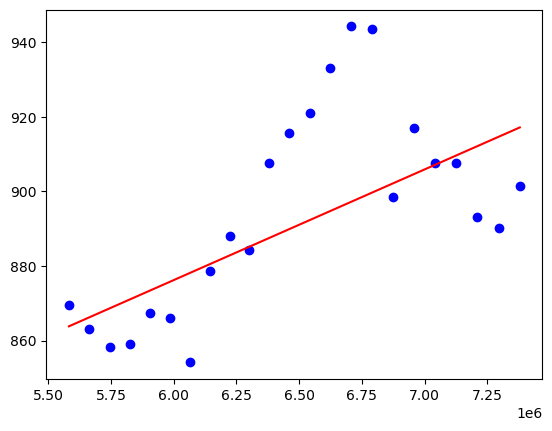

In [13]:
# Plot
plt.scatter(X, y, c = "blue")
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c = "red")
plt.savefig("../Images/PopulationToCO2.png")

In [14]:
# Predictions
predictions = model.predict(X)

print(f"True Output: {y[0]}")
print(f"Predicted Output: {predictions[0]}")
print(f"Prediction Error: {predictions[0] - y[0]}")

True Output: [869.63664471]
Predicted Output: [863.80304201]
Prediction Error: [-5.8336027]


In [15]:
# Mean Squared Error & R2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error: {mse}")
print(f"R2: {r2}")

Mean Squared Error: 494.1950617229251
R2: 0.22847813688311958
